# Лабораторная работа №5

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Загрузка датасета
data = pd.read_csv('datasets/concrete/Concrete_Data.csv',delimiter=';') 

# Переименуем столбцы для удобства
data.columns = ['Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer',
                'CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength']

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
1,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
2,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
4,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70


In [3]:
# Разделение данных на входные признаки (X) и целевую переменную (y)
X = data.drop('CompressiveStrength', axis=1)
y = data['CompressiveStrength']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Построение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [6]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test_scaled)

# Оценка модели
mse = root_mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 3.21


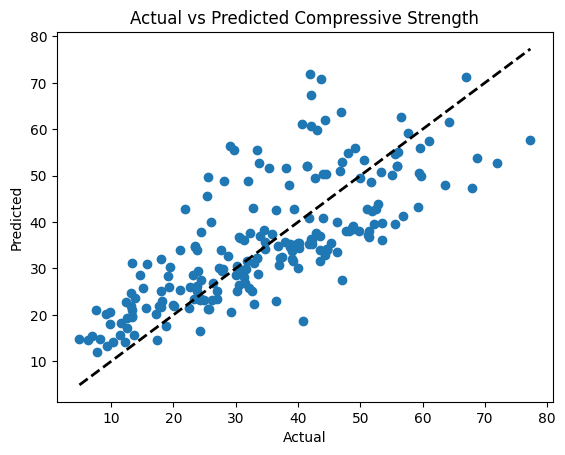

In [7]:
# Визуализация результатов
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Compressive Strength')
plt.show()